In [9]:
import sympy as sp

def velocity():
    return sp.Matrix([-3, 1, 0])

def acceleration():
    return sp.Matrix([0, 1, -2])


In [17]:
def unit_tangent(vector: sp.Matrix):
    return vector.normalized()

unit_tangent_vector = unit_tangent(velocity())

unit_tangent_vector

Matrix([
[-3*sqrt(10)/10],
[   sqrt(10)/10],
[             0]])

In [20]:
def binormal(velocity: sp.Matrix, acceleration: sp.Matrix):
    v_cross_a: sp.Matrix = velocity.cross(acceleration)
    return v_cross_a.normalized()

binormal_vector = binormal(velocity(), acceleration())

binormal_vector


Matrix([
[-2/7],
[-6/7],
[-3/7]])

In [22]:
def normal(binormal: sp.Matrix, unit_tangent: sp.Matrix()):
    return binormal.cross(unit_tangent)

normal_vector = normal(binormal_vector, unit_tangent_vector)

normal_vector

Matrix([
[3*sqrt(10)/70],
[9*sqrt(10)/70],
[-2*sqrt(10)/7]])

In [23]:
print(normal_vector)

Matrix([[3*sqrt(10)/70], [9*sqrt(10)/70], [-2*sqrt(10)/7]])


In [27]:
dir(sp.Matrix)

['C',
 'D',
 'H',
 'LDLdecomposition',
 'LDLsolve',
 'LUdecomposition',
 'LUdecompositionFF',
 'LUdecomposition_Simple',
 'LUsolve',
 'QRdecomposition',
 'QRsolve',
 'T',
 '__abs__',
 '__add__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_class_priority',
 '_diff_wrt',
 '_dod_to_DomainMatrix',
 '_eval_Abs',
 '_eval_Mod',
 '_eval_add',
 '_eval_adjoint',
 '_eval_applyfunc',
 '_eval_as_real_im

In [29]:
help(sp.Matrix.norm)

Help on function norm in module sympy.matrices.matrices:

norm(self, ord=None)
    Return the Norm of a Matrix or Vector.
    
    In the simplest case this is the geometric size of the vector
    Other norms can be specified by the ord parameter
    
    
    =====  ============================  ==========================
    ord    norm for matrices             norm for vectors
    =====  ============================  ==========================
    None   Frobenius norm                2-norm
    'fro'  Frobenius norm                - does not exist
    inf    maximum row sum               max(abs(x))
    -inf   --                            min(abs(x))
    1      maximum column sum            as below
    -1     --                            as below
    2      2-norm (largest sing. value)  as below
    -2     smallest singular value       as below
    other  - does not exist              sum(abs(x)**ord)**(1./ord)
    =====  ============================  ==========================
 

In [31]:
def curvature(acceleration: sp.Matrix(), velocity: sp.Matrix()):
    a_cross_v: acceleration.Matrix() = acceleration.cross(velocity)
    
    a_cross_v_norm = a_cross_v.norm()
    velocity_norm = velocity.norm()

    return a_cross_v_norm/velocity_norm**3

K = curvature(acceleration(), velocity())

K

7*sqrt(10)/100

In [32]:
print(K)

7*sqrt(10)/100


In [33]:
def jerk():
    return sp.Matrix((0, 1, 0))

In [34]:
def torsjon(velocity: sp.Matrix, acceleration: sp.Matrix, jerk: sp.Matrix):
    v_cross_a: sp.Matrix = velocity.cross(acceleration)
    v_cross_a_dot_jerk = sp.Matrix.dot = v_cross_a.dot(jerk)

    v_cross_a_norm: sp.Matrix = v_cross_a.norm()

    return v_cross_a_dot_jerk/v_cross_a_norm**2

T = torsjon(velocity(), acceleration(), jerk())

T

-6/49

In [35]:
print(T)

-6/49


In [36]:
import numpy as np
import matplotlib.pyplot as plt

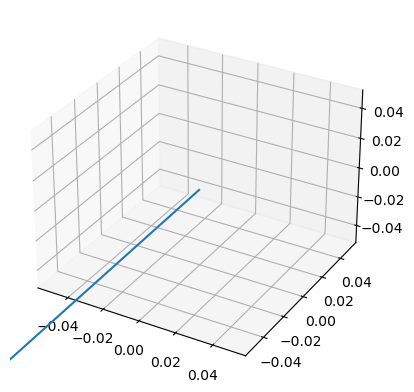

In [67]:
fig = plt.figure()

# Specify the subplot as 3D projection
ax = fig.add_subplot(projection='3d')

# The starting point of the arrow is (0,0,0)
# The arrow vector is (1,1,1)
#ax.quiver(0, 0, 0, 1, 1, 1)

point = sp.Matrix((0, 0, 0))

def matrix2vector(matrix: sp.Matrix):
    endpoint = tuple(matrix)

    startpoint = tuple(0 for _ in endpoint)

    return startpoint + endpoint

ax.quiver(*matrix2vector(binormal_vector))

#lim = [-1, 1]
#
#ax.set_xlim(lim)
#ax.set_ylim(lim)
#ax.set_zlim(lim)

plt.show()